# Pre Processing

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout
from scipy.io import loadmat
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


In [13]:
# Path to your MATLAB (.mat) file
file_path = 'D:/ML project version 2/Dataset/5_AV_features_augmented_data.csv'

In [14]:
# Load data from the MATLAB file
file_data = pd.read_csv(file_path)

In [15]:
# Split features (X) and target (y)
X = file_data.iloc[1:, :13]  # Features (columns 0 to 13)
y = file_data.iloc[1:, 13]   # Labels (column 14th column)

In [16]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Decision Tree

Decision Tree Accuracy: 0.9428200129954516
Decision Tree Confusion Matrix:
[[771  44]
 [ 44 680]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       815
           1       0.94      0.94      0.94       724

    accuracy                           0.94      1539
   macro avg       0.94      0.94      0.94      1539
weighted avg       0.94      0.94      0.94      1539



<Figure size 400x300 with 0 Axes>

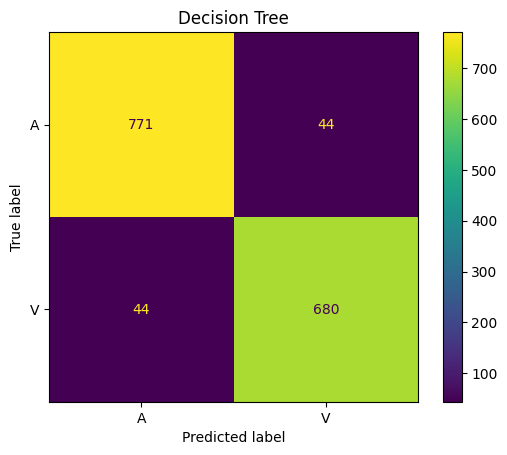

In [17]:

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_pred)
dt_class_report = classification_report(y_test, dt_pred)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Confusion Matrix:")
print(dt_conf_matrix)
print("Decision Tree Classification Report:")
print(dt_class_report)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
ConfusionMatrixDisplay(dt_conf_matrix, display_labels=['A', 'V' ]).plot()
plt.title('Decision Tree')
plt.show()

# KNN


KNN Accuracy: 0.9428200129954516
KNN Confusion Matrix:
[[749  66]
 [ 22 702]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       815
           1       0.91      0.97      0.94       724

    accuracy                           0.94      1539
   macro avg       0.94      0.94      0.94      1539
weighted avg       0.94      0.94      0.94      1539



<Figure size 400x300 with 0 Axes>

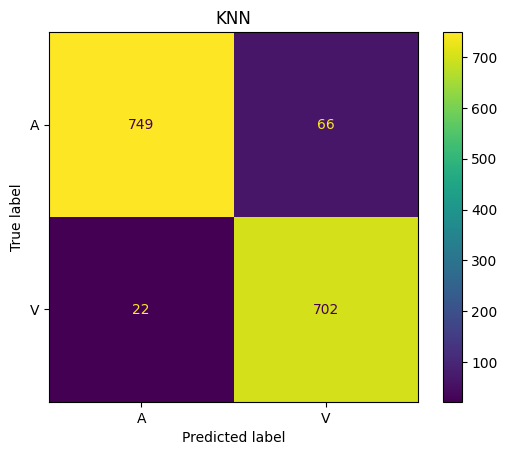

In [18]:
# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
knn_class_report = classification_report(y_test, knn_pred)

print("\nKNN Accuracy:", knn_accuracy)
print("KNN Confusion Matrix:")
print(knn_conf_matrix)
print("KNN Classification Report:")
print(knn_class_report)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
ConfusionMatrixDisplay(knn_conf_matrix, display_labels=['A', 'V' ]).plot()
plt.title('KNN')
plt.show()

# Random Forest

Accuracy: 0.9564652371669915
Confusion Matrix:
 [[775  40]
 [ 27 697]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       815
           1       0.95      0.96      0.95       724

    accuracy                           0.96      1539
   macro avg       0.96      0.96      0.96      1539
weighted avg       0.96      0.96      0.96      1539



<Figure size 400x300 with 0 Axes>

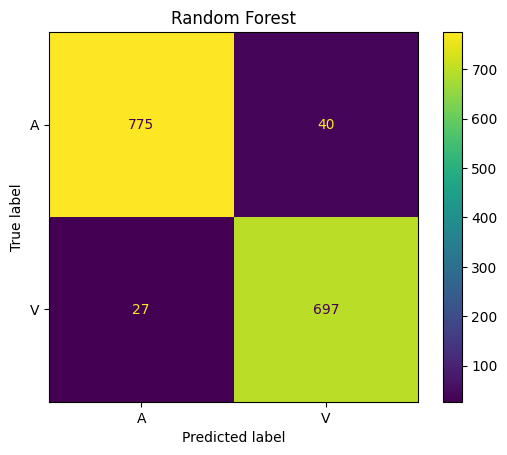

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100,
                                criterion='gini',
                                max_depth=None,
                                min_samples_split=2,
                                min_samples_leaf=1,
                                max_features='sqrt',
                                bootstrap=True,
                                class_weight=None,
                                random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
rf_conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", rf_conf_matrix)
print("Classification Report:\n", class_report)


# Plot confusion matrix
plt.figure(figsize=(4, 3))
ConfusionMatrixDisplay(rf_conf_matrix, display_labels=['A', 'V' ]).plot()
plt.title('Random Forest')
plt.show()

# Ensemble of bagged trees
*with a base classifier of Decision Trees*

Accuracy: 0.9512670565302144
Confusion Matrix:
 [[772  43]
 [ 32 692]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       815
           1       0.94      0.96      0.95       724

    accuracy                           0.95      1539
   macro avg       0.95      0.95      0.95      1539
weighted avg       0.95      0.95      0.95      1539



<Figure size 400x300 with 0 Axes>

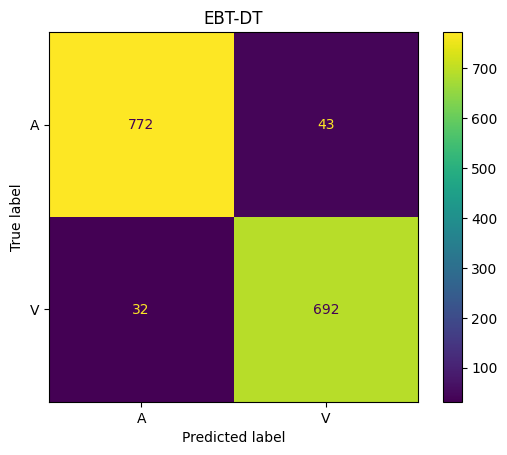

In [20]:
#  Esemble of Bagged trees with a base classifier of Decision Tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Initialize the base decision tree classifier
base_classifier = DecisionTreeClassifier()

# Initialize the bagging classifier with decision tree as base estimator
bagging_classifier = BaggingClassifier(estimator=base_classifier, n_estimators=10, random_state=42)

# Train the bagging classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions
y_pred = bagging_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
ebt_conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", ebt_conf_matrix)
print("Classification Report:\n", class_report)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
ConfusionMatrixDisplay(ebt_conf_matrix, display_labels=['A', 'V']).plot()
plt.title('EBT-DT')
plt.show()

# Ensemble of bagged trees 2
*with a base classifier of Random Forest*

Accuracy: 0.958414554905783
Confusion Matrix:
 [[772  43]
 [ 21 703]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       815
           1       0.94      0.97      0.96       724

    accuracy                           0.96      1539
   macro avg       0.96      0.96      0.96      1539
weighted avg       0.96      0.96      0.96      1539



<Figure size 400x300 with 0 Axes>

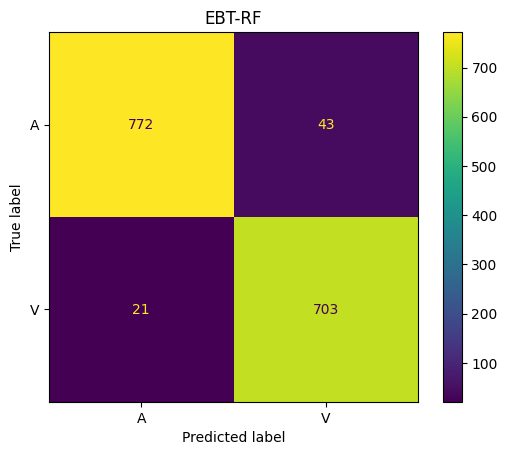

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# Initialize the base random forest classifier
base_classifier = RandomForestClassifier()

# Initialize the bagging classifier with random forest as base estimator
bagging_classifier = BaggingClassifier(estimator=base_classifier, n_estimators=10, random_state=42)

# Train the bagging classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions
y_pred = bagging_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
ebt2_conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", ebt2_conf_matrix)
print("Classification Report:\n", class_report)

# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(4, 3))
ConfusionMatrixDisplay(ebt2_conf_matrix, display_labels=['A', 'V' ]).plot()
plt.title('EBT-RF')
plt.show()

# SVM

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Test Accuracy: 0.8492527615334633
Confusion Matrix:
[[763  52]
 [180 544]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       815
           1       0.91      0.75      0.82       724

    accuracy                           0.85      1539
   macro avg       0.86      0.84      0.85      1539
weighted avg       0.86      0.85      0.85      1539



<Figure size 400x300 with 0 Axes>

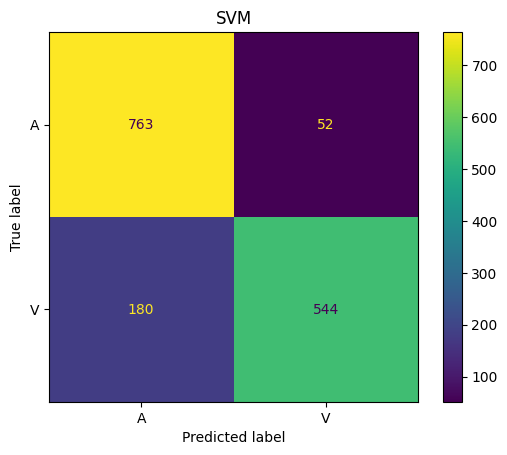

In [23]:
# Create SVM model
svm_model = SVC(kernel='rbf', random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_test)

svm_conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Print confusion matrix
print("Confusion Matrix:")
print(svm_conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Plot confusion matrix
plt.figure(figsize=(4, 3))
ConfusionMatrixDisplay(svm_conf_matrix, display_labels=['A', 'V' ]).plot()
plt.title('SVM')
plt.show()

# Gradient Boosting Machine

In [24]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

Test Accuracy: 0.9571150097465887
Confusion Matrix:
[[780  35]
 [ 31 693]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       815
           1       0.95      0.96      0.95       724

    accuracy                           0.96      1539
   macro avg       0.96      0.96      0.96      1539
weighted avg       0.96      0.96      0.96      1539



<Figure size 400x300 with 0 Axes>

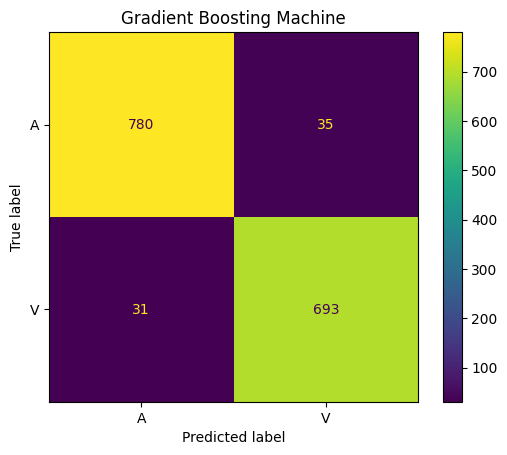

In [25]:
# Create XGBoost model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xgb_model.predict(X_test)

gbm_conf_matrix = confusion_matrix(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Print confusion matrix
print("Confusion Matrix:")
print(gbm_conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Plot confusion matrix
plt.figure(figsize=(4, 3))
ConfusionMatrixDisplay(gbm_conf_matrix, display_labels=['A', 'V' ]).plot()
plt.title('Gradient Boosting Machine')
plt.show()